# Algotytm przecinania się odcinków na płaszczyźnie

In [59]:
%matplotlib inline
from queue import PriorityQueue
from sortedcontainers import SortedSet
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [60]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

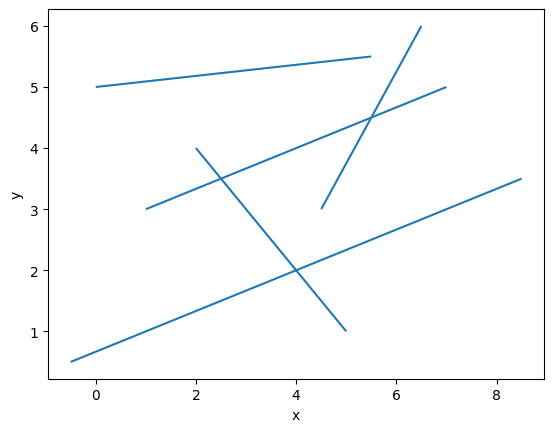

In [61]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

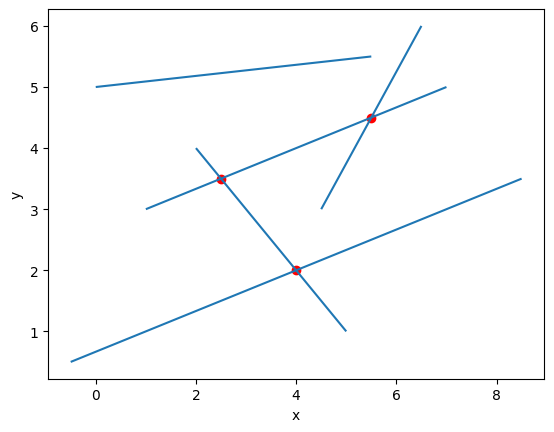

In [62]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [63]:
from random import uniform

def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    xs = set()
    lines = []
    for i in range(n):
        p1 = (uniform(0, max_x), uniform(0, max_y))
        while p1[0] in xs:
            p1 = (uniform(0, max_x), uniform(0, max_y))
        
        xs.add(p1[0])

        p2 = (uniform(0, max_x), uniform(0, max_y))
        while p2[0] in xs:
            p2 = (uniform(0, max_x), uniform(0, max_y))
        
        xs.add(p1[0])

        if p1[0] < p2[0]:
            lines.append((p1, p2))
        else:
            lines.append((p2, p1))

    return lines

In [64]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.140s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [65]:
section = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

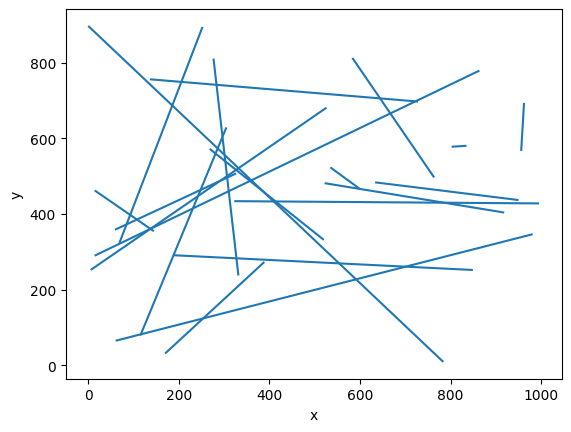

In [66]:
vis = Visualizer()
vis.add_line_segment(section)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

# Add sections with mouse

Może działać w 2 trybach (nowy zbiór, dopisywanie do globalnej listy sections).
Zbiór wynikowy dostępny jest w liście sections.

In [67]:
section = [((157.25806451612905, 187.22943722943722), (235.88709677419357, 831.1688311688312)), ((252.01612903225808, 181.8181818181818), (340.7258064516129, 809.5238095238095)), ((348.7903225806451, 189.93506493506493), (435.48387096774195, 801.4069264069265)), ((461.6935483870968, 195.34632034632034), (526.2096774193549, 809.5238095238095)), ((560.483870967742, 119.58874458874459), (645.1612903225807, 874.4588744588744)), ((651.2096774193549, 84.41558441558439), (780.241935483871, 860.930735930736)), ((118.95161290322582, 763.5281385281386), (852.8225806451613, 712.1212121212121)), ((106.85483870967741, 647.1861471861472), (798.3870967741935, 552.4891774891776)), ((90.7258064516129, 498.37662337662334), (802.4193548387098, 455.08658008658006)), ((74.59677419354838, 411.79653679653677), (790.3225806451613, 260.28138528138527)), ((88.70967741935485, 233.22510822510822), (764.1129032258065, 200.75757575757575))]


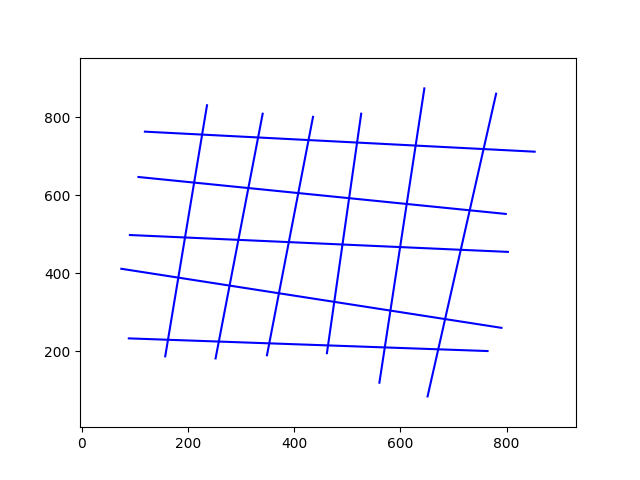

In [68]:
%matplotlib widget
MODE = 1 # 0 - nowy zbiór | 1 - dopisywanie
# [ ((x1,y1), (x2,y2))]
if MODE == 0:
    limit_x = (0, 1000)
    limit_y = (0, 1000)
    section = []
    points_x = []
    points_y = []
else:
    minx = float("inf")
    maxx = -float("inf")
    miny = float("inf")
    maxy = -float("inf")
    points_x = []
    points_y = []
    for line in section:
        minx = min(minx, line[0][0], line[1][0])
        maxx = max(maxx, line[0][0], line[1][0])
        miny = min(miny, line[0][1], line[1][1])
        maxy = max(maxy, line[0][1], line[1][1])
        points_x.append(line[0][0])
        points_x.append(line[1][0])
        points_y.append(line[0][1])
        points_y.append(line[1][1])
    width = maxx - minx
    height = maxy - miny
    limit_x = (minx - width/10, maxx + width/10)
    limit_y = (miny - height/10, maxy + height/10)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(limit_x)
ax.set_ylim(limit_y)

for i in range(1, len(points_x), 2):
    plt.plot(points_x[i-1:i+1], points_y[i-1:i+1], c='blue')

eps = (limit_x[1]-limit_x[0])/100
finished = False

def onclick(event):
    global finished, section, points_x, points_y
    if event.button is MouseButton.RIGHT:
        finished = True
        if len(points_x) % 2 == 1: points_x.pop()
        if len(points_y) % 2 == 1: points_y.pop()
        section = []
        for i in range(1, len(points_x), 2):
            if points_x[i-1] < points_x[i]:
                section.append(((points_x[i-1], points_y[i-1]), (points_x[i], points_y[i])))
            else:
                section.append(((points_x[i], points_y[i]), (points_x[i-1], points_y[i-1])))
    if not finished and event.xdata not in points_x:
        points_x.append(event.xdata)
        points_y.append(event.ydata)
        col = 'blue'
    if finished:
        col = 'green'
    for i in range(1, len(points_x), 2):
        plt.plot(points_x[i-1:i+1], points_y[i-1:i+1], c=col)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [69]:
def save_sections_to_file(sections, file_path):
    with open(file_path, 'w') as file:
        for section in sections:
                file.write(f"{section[0][0]} {section[0][1]} {section[1][0]} {section[1][1]}\n")

def read_sections_from_file(file_path):
    sections = []
    with open(file_path, 'r') as file:
        for line in file:
            coords = list(map(lambda x: float(x), line.trim().split(line)))
            sections.append(((coords[0], coords[1]), (coords[2], coords[3])))
    
    return sections

Uzupełnij funkcję ```is_intersection```

In [70]:
print(section)

[((157.25806451612905, 187.22943722943722), (235.88709677419357, 831.1688311688312)), ((252.01612903225808, 181.8181818181818), (340.7258064516129, 809.5238095238095)), ((348.7903225806451, 189.93506493506493), (435.48387096774195, 801.4069264069265)), ((461.6935483870968, 195.34632034632034), (526.2096774193549, 809.5238095238095)), ((560.483870967742, 119.58874458874459), (645.1612903225807, 874.4588744588744)), ((651.2096774193549, 84.41558441558439), (780.241935483871, 860.930735930736)), ((118.95161290322582, 763.5281385281386), (852.8225806451613, 712.1212121212121)), ((106.85483870967741, 647.1861471861472), (798.3870967741935, 552.4891774891776)), ((90.7258064516129, 498.37662337662334), (802.4193548387098, 455.08658008658006)), ((74.59677419354838, 411.79653679653677), (790.3225806451613, 260.28138528138527)), ((88.70967741935485, 233.22510822510822), (764.1129032258065, 200.75757575757575))]


# Util functions

In [71]:
EPS = 1e-12

def det(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1])

def orient(a, b, c):
    global EPS
    d = det(a, b, c)
    if d > EPS:
        return 1
    elif d < -EPS:
        return -1
    return 0

def is_point_on_segment(segment, point):
    return orient(segment[0], segment[1], point) == 0

def check(s1, s2):
    a, b = s1
    c, d = s2
    return (orient(a, b, c) != orient(a, b, d) and orient(c, d, a) != orient(c, d, b))

def get_intersection_point(s1, s2):
    s1 = s1.get_section()
    s2 = s2.get_section()
    if not check(s1, s2): return None

    a_1 = (s1[1][1] - s1[0][1]) / (s1[1][0] - s1[0][0])
    b_1 = s1[0][1] - a_1 * s1[0][0]

    a_2 = (s2[1][1] - s2[0][1]) / (s2[1][0] - s2[0][0])
    b_2 = s2[0][1] - a_2 * s2[0][0]

    x = (b_2 - b_1) / (a_1 - a_2)
    y = a_1 * (b_2 - b_1) / (a_1 - a_2) + b_1

    return x, y

def y(segment, x):
    segment = segment.get_section()
    x1, y1 = segment[0]
    x2, y2 = segment[1]
    
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1
    return a*x + b

class Section:
    def __init__(self, section, id):
        self.start = section[0]
        self.end = section[1]
        self.a = (self.start[1]-self.end[1])/(self.start[0]-self.end[0])
        self.b = (self.start[1]-self.a*self.start[0])
        self.id = id

    def set_ordering(x):
        Section.ordering_x = x
        
    def get_section(self):
        return (self.start, self.end)

    def __eq__(self, other):
        return self.id == other.id
    
    def __gt__(self, other):
        x = Section.ordering_x
        if self.a*x+self.b == other.a*x+other.b:
            return self.start[1] > other.start[1]
        return self.a*x+self.b > other.a*x+other.b

    def __hash__(self):
        return id(self)

In [72]:
def is_intersection(sections, eps=1e-12):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    Q = PriorityQueue()
    T = SortedSet()

    for i, s in enumerate(sections):
        Q.put((s[0][0], Section(s, i), "S"))
        Q.put((s[1][0], Section(s, i), "E"))

    def insert(seg, x):
        nonlocal T, Q
        Section.set_ordering(x)

        T.add(seg)
        index = T.index(seg)
        
        if index > 0:
            p = get_intersection_point(seg, T[index-1])
            if p:
                Q.put((p[0], (seg, T[index-1]), "I"))
        if index+1 < len(T):
            p = get_intersection_point(seg, T[index+1])
            if p:
                Q.put((p[0], (seg, T[index+1]), "I"))

    while not Q.empty():
        x, s, event = Q.get()
        if event == "S":
            insert(s, x)
        elif event == "E":
            index = T.index(s)
            T.pop(index)
            if 0 < index < len(T)-1:
                p = get_intersection_point(T[index], T[index-1])
                if p:
                    Q.put((p[0], (T[index], T[index-1]), "I"))
        else:
            return True
            
    return False

In [73]:
Test().runtest(2, is_intersection) 

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.066s


Uzupełnij funkcję ```is_intersection_with_visualization```

In [74]:
%matplotlib inline

def is_intersection_with_visualization(sections, eps=1e-12):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    # poniżej dostępna wizualizacja dla pełnej procedury
    pass

Uzupełnij funkcję ```find_intersections```

In [75]:
def find_intersections(sections, eps=1e-12):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    Q = PriorityQueue()
    T = SortedSet()

    result = set()
    intersection_segments = set()

    for i, s in enumerate(sections):
        Q.put((s[0][0], Section(s, i), "S"))
        Q.put((s[1][0], Section(s, i), "E"))

    def check_for_intersection(s1, s2):
        nonlocal intersection_segments, result, Q
        if is_point_on_segment(s1.get_section(), s2.get_section()[0]):
            result.add((s2.get_section()[0], s1.id+1, s2.id+1))
            intersection_segments.add((min(s1.id+1, s2.id+1), max(s1.id+1, s2.id+1)))
        elif is_point_on_segment(s1.get_section(), s2.get_section()[1]):
            result.add((s2.get_section()[1], s1.id+1, s2.id+1))
            intersection_segments.add((min(s1.id+1, s2.id+1), max(s1.id+1, s2.id+1)))
        elif is_point_on_segment(s2.get_section(), s1.get_section()[0]):
            result.add((s1.get_section()[0], s1.id+1, s2.id+1))
            intersection_segments.add((min(s1.id, s2.id)+1, max(s1.id, s2.id)+1))
        elif is_point_on_segment(s2.get_section(), s1.get_section()[1]):
            result.add((s1.get_section()[1], s1.id+1, s2.id+1))
            intersection_segments.add((min(s1.id, s2.id)+1, max(s1.id, s2.id)+1))
        else:
            min_ind = min(s1.id+1, s2.id+1)
            max_ind = max(s1.id+1, s2.id+1)
            p = get_intersection_point(s1, s2)
            if p and (min_ind, max_ind) not in intersection_segments:
                if not is_point_on_segment(s1.get_section(), s2.get_section()[0]) and not is_point_on_segment(s1.get_section(), s2.get_section()[1]) and not is_point_on_segment(s2.get_section(), s1.get_section()[0]) and not is_point_on_segment(s2.get_section(), s1.get_section()[1]):
                    Q.put((p[0], (s1, s2), "I"))
                result.add((p, min_ind, max_ind))
                intersection_segments.add((min_ind, max_ind))


    def insert(seg, x):
        nonlocal T, Q, result, intersection_segments, sections
        Section.set_ordering(x)

        try:
            T.add(seg)
            index = T.index(seg)
        except:
            Section.set_ordering(x+eps)
            T.add(seg)
            index = T.index(seg)
        
        if index > 0:
            check_for_intersection(T[index-1], T[index])
        if index+1 < len(T):
            check_for_intersection(T[index+1], T[index])

    def intersection_found(seg,x):
        nonlocal T, eps, sections, intersection_segments, result
        T.pop(T.index(seg[0]))
        T.pop(T.index(seg[1]))
        Section.set_ordering(x+eps)
        
        T.add(seg[0])
        T.add(seg[1])
        
        index = T.index(seg[0])
        if index > 0 and T[index-1] != seg[1]:
            check_for_intersection(T[index-1], T[index])
        if index+1 < len(T) and T[index+1] != seg[1]:
            check_for_intersection(T[index+1], T[index])

        
        index = T.index(seg[1])
        if index > 0 and T[index-1] != seg[0]:
            check_for_intersection(T[index-1], T[index])
        if index+1 < len(T) and T[index+1] != seg[0]:
            check_for_intersection(T[index+1], T[index])

    while not Q.empty():
        x, s, event = Q.get()
        if event == "S":
            insert(s, x)
        elif event == "E":
            index = T.index(s)
            T.pop(index)
            if 0 < index < len(T):
                check_for_intersection(T[index-1], T[index])
        else:
            intersection_found(s, x)
            
    return result

In [76]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.018s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [77]:
def find_intersections_with_visualization(sections, eps=1e-12):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

    vis = Visualizer()
    vis.add_line_segment(sections, color="blue")
    Q = PriorityQueue()
    T = SortedSet()
        
    T_vis_segments = dict()

    result = set()
    intersection_segments = set()

    for i, s in enumerate(sections):
        Q.put((s[0][0], Section(s, i), "S"))
        Q.put((s[1][0], Section(s, i), "E"))

    def check_for_intersection(s1, s2):
        nonlocal intersection_segments, result, Q, vis, eps
        segments_to_check_vis = vis.add_line_segment([s1.get_section(), s2.get_section()], color="green", linestyle="--",zorder=98)
        
        if is_point_on_segment(s1.get_section(), s2.get_section()[0]):
            result.add((s2.get_section()[0], s1.id+1, s2.id+1))
            vis.add_point(s2.get_section()[0], color="green", zorder=100)
            intersection_segments.add((min(s1.id+1, s2.id+1), max(s1.id+1, s2.id+1)))
        elif is_point_on_segment(s1.get_section(), s2.get_section()[1]):
            result.add((s2.get_section()[1], s1.id+1, s2.id+1))
            vis.add_point(s2.get_section()[1], color="green", zorder=100)
            intersection_segments.add((min(s1.id+1, s2.id+1), max(s1.id+1, s2.id+1)))
        elif is_point_on_segment(s2.get_section(), s1.get_section()[0]):
            result.add((s1.get_section()[0], s1.id+1, s2.id+1))
            vis.add_point(s1.get_section()[0], color="green", zorder=100)
            intersection_segments.add((min(s1.id, s2.id)+1, max(s1.id, s2.id)+1))
        elif is_point_on_segment(s2.get_section(), s1.get_section()[1]):
            result.add((s1.get_section()[1], s1.id+1, s2.id+1))
            vis.add_point(s1.get_section()[1], color="green", zorder=100)
            intersection_segments.add((min(s1.id, s2.id)+1, max(s1.id, s2.id)+1))
        else:
            min_ind = min(s1.id+1, s2.id+1)
            max_ind = max(s1.id+1, s2.id+1)
            p = get_intersection_point(s1, s2)
            if p and (min_ind, max_ind) not in intersection_segments:
                Q.put((p[0], (s1, s2), "I"))
                result.add((p, min_ind, max_ind))
                intersection_segments.add((min_ind, max_ind))
                vis.add_point(p, color="green", zorder=100)
        vis.remove_figure(segments_to_check_vis)


    def insert(seg, x):
        nonlocal T, Q, result, intersection_segments, sections, vis
        Section.set_ordering(x)

        try:
            T.add(seg)
            index = T.index(seg)
        except:
            Section.set_ordering(x+eps)
            T.add(seg)
            index = T.index(seg)
        
        if seg not in T_vis_segments.keys():
            T_vis_segments[seg] = vis.add_line_segment(seg.get_section(), color="yellow")

        if index > 0:
            check_for_intersection(T[index-1], T[index])
        if index+1 < len(T):
            check_for_intersection(T[index+1], T[index])

    def intersection_found(seg,x):
        nonlocal T, eps, sections, intersection_segments, result
        T.pop(T.index(seg[0]))
        T.pop(T.index(seg[1]))
        Section.set_ordering(x+eps)
        
        T.add(seg[0])
        T.add(seg[1])
        index = T.index(seg[0])
        if index > 0 and T[index-1] != seg[1]:
            check_for_intersection(T[index-1], T[index])
        if index+1 < len(T) and T[index+1] != seg[1]:
            check_for_intersection(T[index+1], T[index])

        
        index = T.index(seg[1])
        if index > 0 and T[index-1] != seg[0]:
            check_for_intersection(T[index-1], T[index])
        if index+1 < len(T) and T[index+1] != seg[0]:
            check_for_intersection(T[index+1], T[index])

    broom_vis = None
    prev_broom_pos = None

    while not Q.empty():
        x, s, event = Q.get()
        if prev_broom_pos != x:
            if broom_vis != None:
                vis.remove_figure(broom_vis)
            broom_vis = vis.add_line(((x, 0), (x, 0.00001)), color="red", linestyle="--", zorder=99)
            prev_broom_pos = x
        if event == "S":
            insert(s, x)
        elif event == "E":
            index = T.index(s)
            T.pop(index)
            vis.add_line_segment(s.get_section(), color="black")
            if 0 < index < len(T):
                check_for_intersection(T[index-1], T[index])
        else:
            intersection_found(s, x)
            
    return result, vis

0
1
2
3


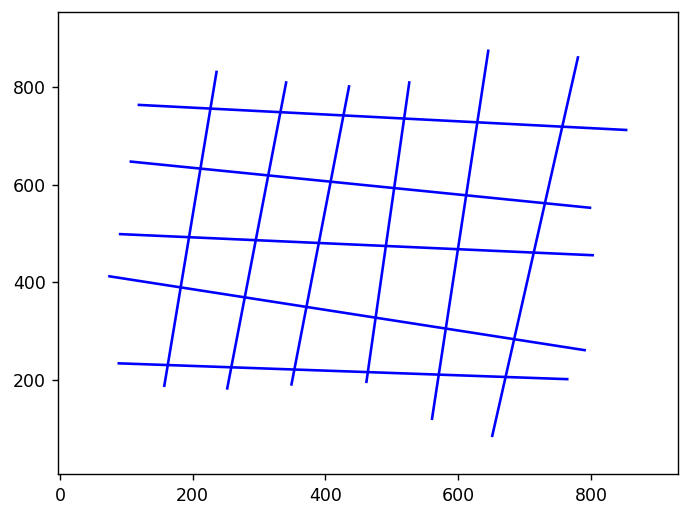

In [78]:
sections1 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
sections2 = [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]
sections3 = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)), ((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)), ((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)), ((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)), ((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)), ((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)), ((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)), ((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)), ((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)), ((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]

data_for_tests = [sections1, sections2, sections3]

data_for_tests.append(generate_uniform_sections(1000, 1000, 10))


for i, test in enumerate(data_for_tests):
    print(i)
    res, vis = find_intersections_with_visualization(test)
    num_of_intersections = len(res)
    vis.save_gif(i)

In [79]:
section_to_test = [((157.25806451612905, 187.22943722943722), (235.88709677419357, 831.1688311688312)), ((252.01612903225808, 181.8181818181818), (340.7258064516129, 809.5238095238095)), ((348.7903225806451, 189.93506493506493), (435.48387096774195, 801.4069264069265)), ((461.6935483870968, 195.34632034632034), (526.2096774193549, 809.5238095238095)), ((560.483870967742, 119.58874458874459), (645.1612903225807, 874.4588744588744)), ((651.2096774193549, 84.41558441558439), (780.241935483871, 860.930735930736)), ((118.95161290322582, 763.5281385281386), (852.8225806451613, 712.1212121212121)), ((106.85483870967741, 647.1861471861472), (798.3870967741935, 552.4891774891776)), ((90.7258064516129, 498.37662337662334), (802.4193548387098, 455.08658008658006)), ((74.59677419354838, 411.79653679653677), (790.3225806451613, 260.28138528138527)), ((88.70967741935485, 233.22510822510822), (764.1129032258065, 200.75757575757575)), ((350.7414151925079, 121.35267330072523), (710.3570499479711, 878.0499803227076))]
res, vis = find_intersections_with_visualization(section_to_test)
num_of_intersections = len(res)
vis.save_gif("t")


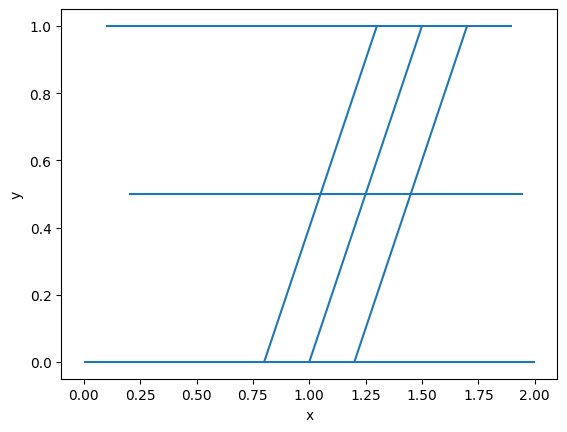

In [80]:
test = [((0.0,0.0),(2.0,0.0)), ((1,0), (1.5, 1)), ((1.2,0), (1.7, 1)), ((0.8,0), (1.3, 1)), ((0.1,1), (1.9, 1)), ((0.2, 0.5), (1.95, 0.5))]
vis = Visualizer()
vis.add_line_segment(test)
vis.show()

# res = find_intersections(test)
# print(res)

res, vis = find_intersections_with_visualization(test)
num_of_intersections = len(res)
vis.save_gif("t2")